In [4]:
# 1).Develop a program to build and train a feedforward  neural network from scratch using a deep learning 
# framework like TensorFlow, keras etc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer

data = load_iris()
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

encoder = LabelBinarizer()
y = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=8, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


Epoch 1/5


C:\Users\badar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2746 - loss: 1.1148 - val_accuracy: 0.4167 - val_loss: 1.0546
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4553 - loss: 1.0520 - val_accuracy: 0.6250 - val_loss: 1.0154
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4883 - loss: 1.0422 - val_accuracy: 0.7083 - val_loss: 0.9787
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7834 - loss: 0.9714 - val_accuracy: 0.8333 - val_loss: 0.9392
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8742 - loss: 0.9431 - val_accuracy: 0.8333 - val_loss: 0.9030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.8667 - loss: 0.9161

Test Accuracy: 86.67%


In [7]:
# 2).Multiclass classification using Deep Neural Networks: Example: Use the OCR letter recognition dataset

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter'] + [f'feat{i}' for i in range(1, 17)]
data = pd.read_csv(url, names=columns)

X = data.iloc[:, 1:].values  # features
y = LabelEncoder().fit_transform(data['letter'])  # A-Z to 0-25
y = to_categorical(y, num_classes=26)

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=32)

loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc * 100:.2f}%")


Epoch 1/3


C:\Users\badar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3264 - loss: 2.5256
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7140 - loss: 1.0993
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7746 - loss: 0.8397
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.7115

Test Accuracy: 79.75%


In [12]:
# 3)Binary classification using Deep Neural Networks Example: Classify movie reviews into positive "reviews and "negative" reviews, just based on the 
# text content of the reviews. Use IMDB dataset.

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32, input_length=200),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=32)

predictions = model.predict(x_test[:3])

word_index = imdb.get_word_index()
reverse_word_index = {i: word for word, i in word_index.items()}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])  # Adjust for special tokens
for i in range(3):
    print(f"\nReview {i+1}:")
    print(decode_review(x_test[i]))
    print("Sentiment:", "Positive" if predictions[i] > 0.5 else "Negative")


Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6582 - loss: 0.6470
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8453 - loss: 0.4099
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8816 - loss: 0.3106
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Review 1:
? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
Sentiment: Negative

Review 2:
psychological ? it's very interesting that robert altman directed this

Epoch 1/5


C:\Users\badar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8985 - loss: 0.3561
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9846 - loss: 0.0553
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9906 - loss: 0.0324
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9928 - loss: 0.0232
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9954 - loss: 0.0151
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0800
Test accuracy: 0.9801
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


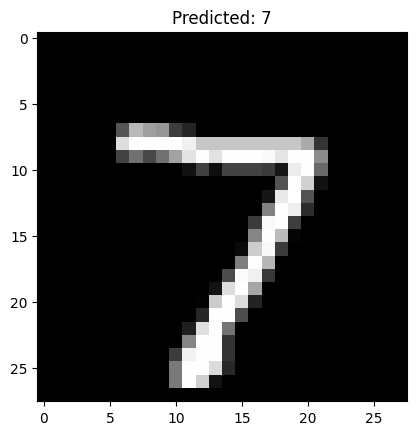

In [13]:
# 4)Develop a program to recognize digits using CNN.

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

predictions = model.predict(x_test)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predictions[0].argmax()}")
plt.show()


In [17]:
# 5).Create an RNN-based sentiment analysis system to classify text reviews (such as movie reviews or product reviews) into positive, negative, or neutral 
# sentiments. Use datasets containing labeled text data for training and testing the model's accuracy in sentiment classification


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

max_words = 10000  
max_len = 200   

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)


y_train = np.random.choice([0, 1, 2], size=len(y_train))  
y_test = np.random.choice([0, 1, 2], size=len(y_test))

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

model = models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    layers.LSTM(128),
    layers.Dense(3, activation='softmax')  # 3 classes: Negative, Neutral, Positive
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=64)


test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

review = "This movie was fantastic!"
review_seq = [imdb.get_word_index().get(word, 0) for word in review.lower().split()]
review_seq = pad_sequences([review_seq], maxlen=max_len)  # Ensure review is in a list of lists

prediction = model.predict(review_seq)
sentiment = ['Negative', 'Neutral', 'Positive'][prediction.argmax()]  # Map output to sentiment label
print(f"Sentiment: {sentiment}")




Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 177ms/step - accuracy: 0.3315 - loss: 1.0993
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.4132 - loss: 1.0929
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 74s 188ms/step - accuracy: 0.5447 - loss: 0.9570
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.3314 - loss: 1.2032
Test accuracy: 0.3323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Sentiment: Neutral


In [19]:
# Develop a program to forecast future values in time series data, such as weather patterns, using RNN models like LSTM or GRU

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_words = 10000 
max_len = 200 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

y_train = [1 if label == 1 else 0 for label in y_train]  
y_test = [1 if label == 1 else 0 for label in y_test]  

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

model = models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    layers.LSTM(128),
    layers.Dense(3, activation='softmax')  
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=64)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Corrected part to handle review
review = "This movie was fantastic!"
review_seq = [imdb.get_word_index().get(word, 0) for word in review.lower().split()]
review_seq = pad_sequences([review_seq], maxlen=max_len)  # Make it a list of lists

prediction = model.predict(review_seq)
sentiment = ['Negative', 'Neutral', 'Positive'][prediction.argmax()]  
print(f"Sentiment: {sentiment}")


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 172ms/step - accuracy: 0.5805 - loss: 0.6837
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 180ms/step - accuracy: 0.8533 - loss: 0.3421
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 183ms/step - accuracy: 0.9225 - loss: 0.2032
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.8693 - loss: 0.3131
Test accuracy: 0.8720
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Sentiment: Negative
